## Overview
 - Exploring and visualizing datasets
 - Looking at different approaches to implement linear regression models
 - Training regression models that are robust to outliers
 - Evaluating regression models and diagnosing common problems
 - Fitting regression models to nonlinear data

## Exploring Housing Dataset
- <b>CRIM</b>: This is the per capita crime rate by town
- <b>ZN</b>: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- <b>INDUS</b>: This is the proportion of non-retail business acres per town
- <b>CHAS</b>: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- <b>NOX</b>: This is the nitric oxides concentration (parts per 10 million)
- <b>RM</b>: This is the average number of rooms per dwelling
- <b>AGE</b>: This is the proportion of owner-occupied units built prior to 1940
- <b>DIS</b>: This is the weighted distances to five Boston employment centers
- <b>RAD</b>: This is the index of accessibility to radial highways
- <b>TAX</b>: This is the full-value property-tax rate per 
\$10,000
- <b>PTRATIO</b>: This is the pupil-teacher ratio by town
- <b>B</b>: This is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town
- <b>LSTAT</b>: This is the percentage lower status of the population
- <b>MEDV</b>: This is the median value of owner-occupied homes in $1000s

In [1]:
import pandas as pd
df = \
pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
             'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
             'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### EDA
visualizing the important characteristics

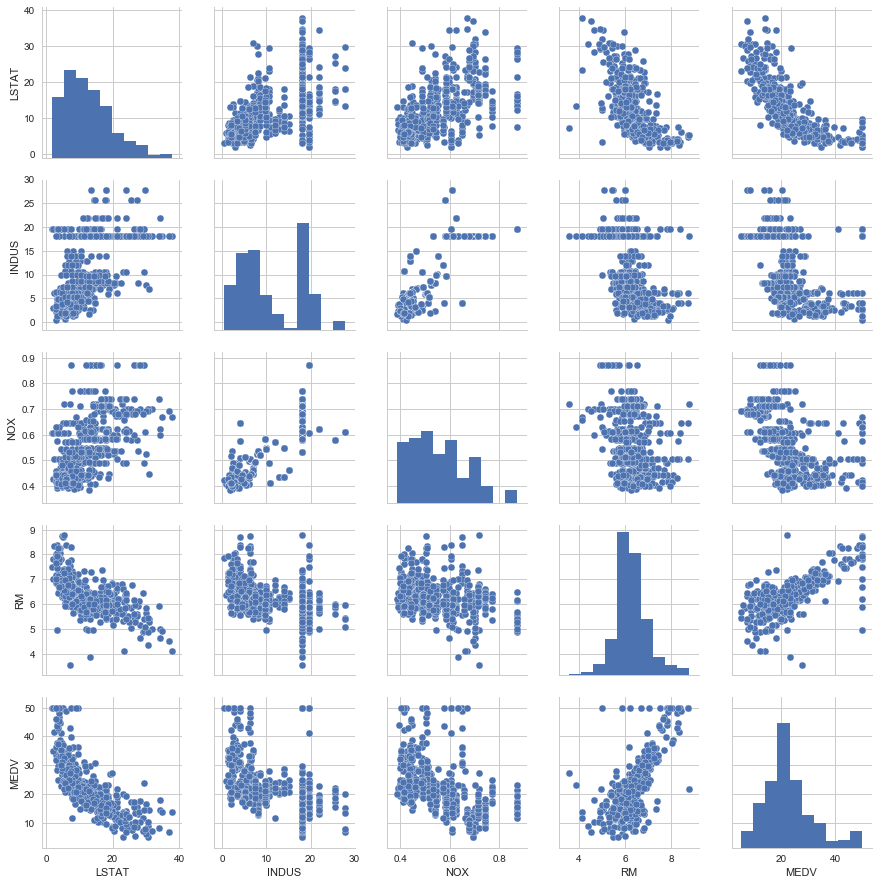

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()

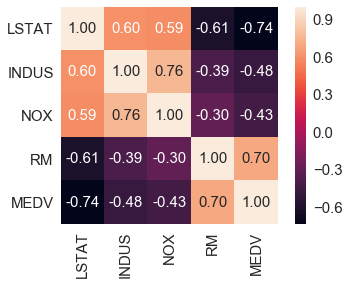

In [4]:
## get correlation between these 5 (corrcoef --> matrix)
## visualize on heatmap
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)
plt.show()

In [5]:
## ordinary least squares regression model
## mimimizes the sum of squared virtical distances (risiduals or errors)

class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [6]:
X = df[['RM']].values
y = df['MEDV'].values

In [7]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [8]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

In [9]:
sns.reset_orig()
%matplotlib inline

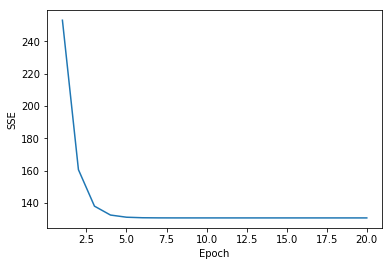

In [10]:
## plot cost as function of number of epochs (passes through training set)
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [11]:
## visualize how well linear reg line fits training data
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None


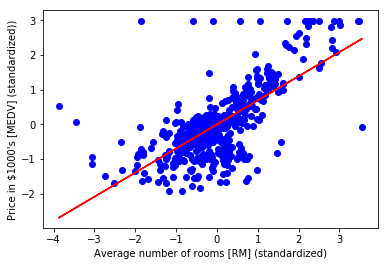

In [12]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized))')
plt.show()

In [13]:
## to scale predicted price outcome back (from standardized)
## we can apply inverse_transform method of the StandardScaler
num_rooms_std = sc_x.transform([[5.0]])
price_std = lr.predict(num_rooms_std)
print('Price in $1000\'s: %.3f' % sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


In [14]:
## since we standardized the data, we don't techincally
## have to update the weights since y-int will always be 0
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


### Estimating coefficient of regression model using scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


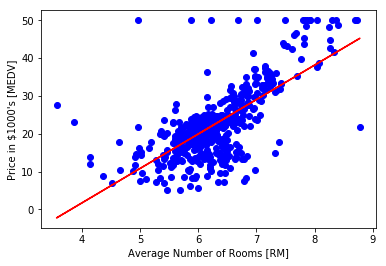

In [16]:
lin_regplot(X, y, slr)
plt.xlabel('Average Number of Rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

### Fitting robust regression model using RANSAC
RANdom SAmple Consensus (RANSAC)

In [17]:
from sklearn.linear_model import RANSACRegressor


In [18]:
ransac = RANSACRegressor(LinearRegression(),
                         max_trials = 100,
                         min_samples = 50,
                         loss = 'absolute_loss',
                         residual_threshold = 5.0,
                         random_state = 0)
ransac.fit(X, y)

RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_skips=inf, max_trials=100, min_samples=50, random_state=0,
        residual_metric=None, residual_threshold=5.0, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

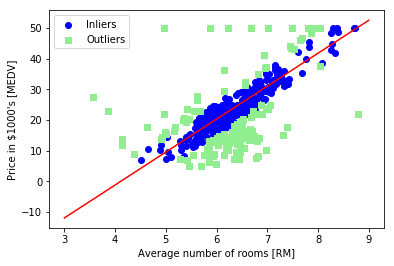

In [19]:
## let's obtain inliers and outliers from RANSAC model
## and plot them together with linear fit
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o',
           label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
           c='lightgreen', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [20]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


### Evaluating performance of linear regression models

In [21]:
from sklearn.model_selection import train_test_split
## using all variables
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

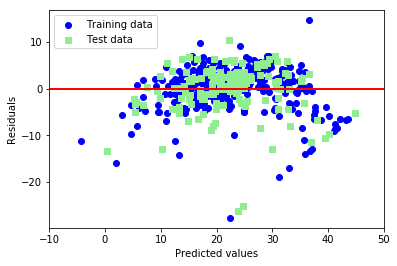

In [22]:
## residual plots
## plot where we subtract the target variables from predicted response
plt.scatter(y_train_pred, y_train_pred - y_train,
           color='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
           color='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

In [23]:
## MSE
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % 
      (mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


In [24]:
## R^2
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %
     (r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


## Using regularization methods for regression

In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [26]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.926, test: 28.876
R^2 train: 0.753, test: 0.653


In [27]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)

[-1.18308575e-01  4.61259764e-02 -2.08626416e-02  2.45868617e+00
 -8.25958494e+00  3.89748516e+00 -1.79140171e-02 -1.39737175e+00
  2.18432298e-01 -1.16338128e-02 -9.31711410e-01  7.26996266e-03
 -4.94046539e-01]


In [28]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.145, test: 27.762
R^2 train: 0.762, test: 0.667


In [29]:
## ElasticNet
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elanet.fit(X_train, y_train)
y_train_pred = elanet.predict(X_train)
y_test_pred = elanet.predict(X_test)
print(elanet.coef_)

[-0.08344408  0.05179376 -0.01702468  0.         -0.          0.90890973
  0.01218953 -0.83010765  0.23558231 -0.01502425 -0.84881663  0.00687826
 -0.72504946]


In [30]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 24.381, test: 31.874
R^2 train: 0.712, test: 0.617


## Turning linear regression model into a curve 
### Polynomial regression

In [31]:
## Step 1
### Add a second degree polynomial term
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0,
              320.0, 342.0, 368.0,
              396.0, 446.0, 480.0,
              586.0])[:, np.newaxis]

y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [32]:
## Step 2
### Fit simple linear regression model for comparison
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

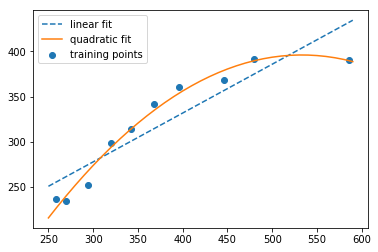

In [33]:
## Step 3
### Fit muliple regression model on the transformed features
### for polynomial regression
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))
## Plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

In [34]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)
print('Training MSE linear: %.3f, quadratic: %.3f' %
     (mean_squared_error(y, y_lin_pred),
     mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' %
     (r2_score(y, y_lin_pred),
     r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


### Modeling nonlinear relationships in housing data
will model relationship between house prices and LSTAT(percent lower status of population) using second degree(quadratic) and third degree(cubic) polynomials and compare to linear fit

In [35]:
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

In [36]:
## create polynomial features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [37]:
## linear fit
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [38]:
## quadratic fit
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [39]:
## cubic fit
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

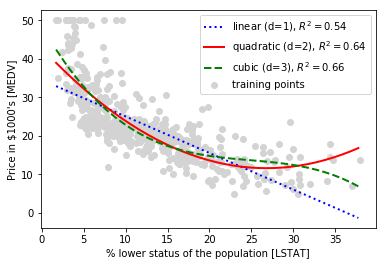

In [40]:
## plot results
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$'
        % linear_r2, color='blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label='quadratic (d=2), $R^2=%.2f$'
        % quadratic_r2, color='red', lw=2, linestyle='-')
plt.plot(X_fit, y_cubic_fit, label='cubic (d=3), $R^2=%.2f$'
        % cubic_r2, color='green', lw=2, linestyle='--')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')
plt.show()

In [41]:
## see fit of log transform of LSTAT and sqrt of MEDV
## transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

In [42]:
## fit features
X_fit = np.arange(X_log.min()-1,
                 X_log.max()-1, 1)[:, np.newaxis]
regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))


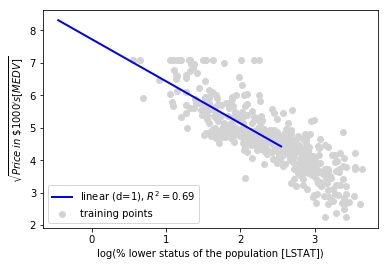

In [43]:
## plot results
plt.scatter(X_log, y_sqrt,
            label='training points',
            color='lightgray')
plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')
plt.show()

#### Dealing with nonlinear relationships using random forests

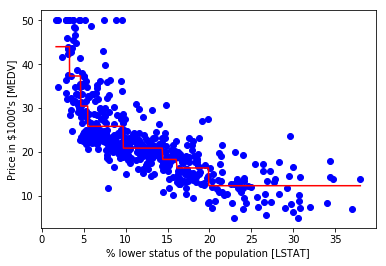

In [44]:
## decision tree regressor
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDV'].values
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

#### Random forest regression

In [45]:
## using all the features in the housing data
## 60/40 split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.4, random_state=1)

In [46]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,
                              criterion='mse',
                              random_state=1,
                              n_jobs=1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % 
      (mean_squared_error(y_train, y_train_pred),
      mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %
     (r2_score(y_train, y_train_pred),
     r2_score(y_test, y_test_pred)))


MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878


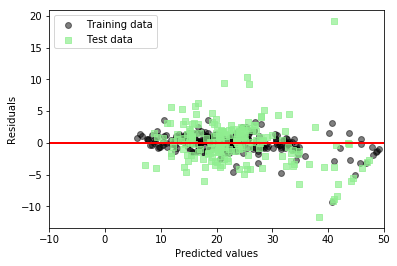

In [47]:
## residuals on the prediction
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='black', 
            marker='o', 
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='lightgreen', 
            marker='s', 
            s=35,
            alpha=0.7,
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()